In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50
logs_path = '/tmp/tensorflow_logs/example/'

In [3]:
# train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

train_X = np.arange(10)
train_Y = np.arange(10)

n_samples = train_X.shape[0]

In [8]:
X_1 = tf.placeholder(tf.int64)
X_2 = tf.placeholder(tf.int64)

Y = tf.placeholder(tf.int64)

W_1 = tf.Variable(rng.randint(10, size=10), name="weights_1")
# W_2 = tf.Variable(rng.randn(), name="weights_2")

b_1 = tf.Variable(rng.randint(10, size=10), name="bias_1")
# b_2 = tf.Variable(rng.randn(), name="bias_2")

with tf.name_scope('model'):
    Y_pred_1 = tf.add(tf.multiply(X_1, W_1), b_1)

# with tf.name_scope('loss'):
#     # mean squared error
#     cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    
# with tf.name_scope('accuracy'):
#     acc = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
#     acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# with tf.name_scope('sgd'):
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

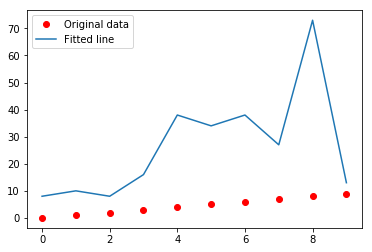

In [10]:
init = tf.global_variables_initializer()

# tf.summary.scalar("loss", cost)
# tf.summary.scalar("accuracy", acc)
# merged_summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)
    
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(
                [Y_pred_1], 
                feed_dict={X_1: x, Y: y}
            )
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W_1) * train_X + sess.run(b_1), label='Fitted line')
    plt.legend()
    plt.show()

In [6]:
rng.randint(10, size=10)

array([4, 8, 5, 2, 0, 5, 3, 0, 2, 2])